In [487]:
import geopandas as gpd
import pandas as pd
import numpy as np
import joblib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patch
%matplotlib inline
import shapely.geometry as geom
from descartes import PolygonPatch
from shapely.geometry import Point, LineString

In [488]:
prod_loc = pd.read_csv(r'C:/Users/pierr/Google Drive/UC BERKELEY MEng/Hackathon_gpseo/carnet-producteurs.csv', sep=';', encoding='utf-8')
voirie = pd.read_csv(r'C:/Users/pierr/Google Drive/UC BERKELEY MEng/Hackathon_gpseo/hackathon_gpseo/VOIRIE.csv', encoding='utf-8')

In [489]:
prod_loc

,Produit,Commune,Insee,Producteur / Societe,Point de vente,Voie,Numéro,Ouverture,y,x,Horaires,id-pdv,geo
0,"Oeufs,Volaille",WERVICQ-SUD,59656.0,EARL MARLIERE,Vente a la ferme,DE LA JUSTICE,30.0,FERME,7.072642e+06,703482.906628,"Lundi, Mardi, Mercredi, Jeudi, Vendredi de 14h...",777,"50.7503930024,3.0492603139"
1,NaN,WAMBRECHIES,59636.0,THIERRY GRAVE,Talents de fermes,DE LINSELLES,168.0,FERME,NaN,NaN,"Dimanche de 09h00 a 12h00\n Mardi, Mercredi, J...",722,NaN
2,"Fraises,Framboises,Salades,Tomates",COMINES,59152.0,LA CUEILLETTE DE COMINES,Vente a la ferme,DE LA TIMBORNE,240.0,FERME,7.072757e+06,700852.047000,"Dimanche de 10h30 a 12h30\n Mardi, Mercredi, J...",827,"50.7514334603,3.01205113326"
3,"Bieres,Coloquintes decoratives,Courges,Pates s...",MARQUILLIES,59388.0,FERME DES MOTTES,Talents de fermes,DE LA FERME DES MOTTES,330.0,FERME,NaN,NaN,"Dimanche de 09h00 a 12h00\n Mardi, Mercredi, J...",832,NaN
4,"Cremes glacees,Yaourts",QUESNOY SUR DEULE,59482.0,FERME DE LA CLARINE,Le Panier Vert,DE WAMBRECHIES (D308),361.0,FERME,7.066648e+06,698434.745849,"Lundi, Mardi, Mercredi, Jeudi, Vendredi de 09h...",656,"50.6966213103,2.97788564494"
5,Oeufs,LINSELLES,59352.0,SYLVAIN CASIEZ,Vente a la ferme,CHEMIN DES BOIS BLANCS,NaN,FERME,7.071312e+06,706875.095850,"Dimanche de 10h00 a 12h30\n Lundi, Mardi, Merc...",756,"50.7384368798,3.09721438685"
6,"Fromages,Legumes de saison",WAVRIN,59653.0,BIOCOOP VERT'TIGE,Vente a la ferme,RUE ANATOLE FRANCE(RD241),NaN,FERME,7.054005e+06,695716.710563,"Mardi, Mercredi, Jeudi, Vendredi, Samedi de 10...",822,"50.5831459743,2.93962106869"
7,"Confitures,Fleurs,Gaufres fourrees,Oeufs,Quich...",NaN,NaN,LA FERME DU PARADIS,Cuillette,NaN,NaN,FERME,NaN,NaN,"Lundi, Mardi, Mercredi, Jeudi, Vendredi, Samed...",838,NaN
8,"Beurre de ferme,Fromage blanc,Fromages,Lait,La...",VENDEVILLE,59609.0,EARL CARRE,Vente a la ferme,RUE DE FACHES(RD145H),NaN,FERME,7.053355e+06,705537.338147,"Lundi, Mardi, Mercredi, Jeudi, Vendredi, Samed...",842,"50.5773050587,3.07804743227"
9,"Arbres,Arbustes,Coniferes,Sapins de Noel,Vivaces",WAVRIN,59653.0,JOSEPH VANMARCKE,Vente a la ferme,RUE DE LILLE,NaN,FERME,7.053634e+06,695231.165797,"Dimanche de 10h00 a 12h00\n Lundi, Mardi, Merc...",751,"50.5798129936,2.93278109363"


In [490]:
#prod_loc[prod_loc["Insee"].str.contains("NaN") == True]
#df3[df3["user_"].str.contains("TRANSCRIPTuser_3134") == False]

In [491]:
#df3[(df3["message"].str.contains("sorry") == True)]

In [492]:
#prod_loc["Insee"] = prod_loc["Insee"].dropna()
#prod_loc.dropna(inplace=True)

In [493]:
#prod_loc.head()

In [494]:
#prod_loc["Insee"] = prod_loc["Insee"].astype(int)

In [495]:
voirie

,objectid_1,objectid_2,gid,id,objectid,id_ign,id_tr,id_tmp,nature,numero,...,domanialit,rem_domani,mitoyen,doute,ch_long,autre_rem,globalid,shape__len,domania_l,st_length_
0,46903,0,420,52906.0,0.0,NaN,NaN,0.0,NaN,NaN,...,COMMUNALE,NaN,EPONE,NaN,7.277262,NaN,f88c2c8b-f570-4239-b1c3-22683111e952,7.277262,GPSEO,7.277262
1,46904,0,421,52906.0,0.0,NaN,NaN,0.0,NaN,NaN,...,COMMUNALE,NaN,MEZIERES-SUR-SEINE,NaN,0.205734,NaN,d485c3a3-0d70-4bf4-9e02-24ba35d5acab,0.205734,GPSEO,0.205734
2,46905,0,422,52906.0,0.0,NaN,NaN,0.0,NaN,NaN,...,COMMUNALE,NaN,MEZIERES-SUR-SEINE,NaN,27.798827,NaN,2a665385-8bdf-45f3-b4cc-a35db6ef049b,27.798827,GPSEO,27.798827
3,46906,0,423,52906.0,0.0,NaN,NaN,0.0,NaN,NaN,...,COMMUNALE,NaN,EPONE,NaN,0.076824,NaN,c787d923-ecac-4807-bb11-685894f15ae6,0.076824,GPSEO,0.076824
4,46575,0,10756,22226.0,23717.0,TRONROUT0000000005100374,TR781180022226,22824.0,Chemin pour circulation de véhicules ou d'engi...,NC,...,NR,NaN,NaN,NaN,18.126973,NaN,31d03d91-ad18-42d3-a59f-b7aa83e74629,18.126973,AUTRES,18.126973
5,46907,0,424,52906.0,0.0,NaN,NaN,0.0,NaN,NaN,...,COMMUNALE,NaN,EPONE,NaN,0.114766,NaN,16e77c31-d805-47cb-8798-55486050c64e,0.114766,GPSEO,0.114766
6,46908,0,425,52906.0,0.0,NaN,NaN,0.0,NaN,NaN,...,COMMUNALE,NaN,MEZIERES-SUR-SEINE,NaN,66.829664,NaN,02f31a73-f422-40ef-948f-a0821c12f240,66.829664,GPSEO,66.829664
7,46909,0,15203,43255.0,44508.0,NaN,TR784400041960,0.0,NaN,NaN,...,DPC,NaN,NaN,NaN,389.252077,CENTRE COMMERCIAL,2c908a1c-47d5-49a5-b6ee-2ed4b55aa839,389.252077,DOMAINE PRIVE DE LA COMMUNE,389.252077
8,46917,0,15238,43162.0,44564.0,NaN,TR784400042016,0.0,NaN,NaN,...,COMMUNALE,NaN,NaN,NaN,98.246315,Voie accessible,60044860-3163-43bb-b946-6c13b403edb9,98.246315,GPSEO,98.246315
9,46918,0,15239,43161.0,44564.0,NaN,TR784400042016X,0.0,NaN,NaN,...,COMMUNALE,NaN,NaN,NaN,38.424602,Voie accessible,b3a64046-3334-4b7c-9b2a-f98f1a5b6eb0,38.424602,GPSEO,38.424601


In [496]:
ville = list(voirie.com_insee.unique())
print(ville)

[78402.0, 78217.0, 78354.0, 78440.0, 78431.0, 78172.0, 78090.0, nan, 78401.0, 78206.0, 78123.0, 78299.0, 78638.0, 78335.0, 78029.0, 78234.0, 78005.0, 78070.0, 78531.0, 78267.0, 78230.0, 78296.0, 78362.0, 78624.0, 78300.0, 78020.0, 78325.0, 78498.0, 78231.0, 78202.0, 78031.0, 78643.0, 78238.0, 78501.0, 78113.0, 78536.0, 78246.0, 78437.0, 78361.0, 78291.0, 78484.0, 78245.0, 78239.0, 78290.0, 78227.0, 78466.0, 78281.0, 78033.0, 78451.0, 78647.0, 78104.0, 78597.0, 78314.0, 78329.0, 78567.0, 78642.0, 78140.0, 78138.0, 78324.0, 78010.0, 78672.0, 78384.0, 78015.0, 78609.0, 78460.0, 78403.0, 78327.0, 78528.0, 78391.0, 78416.0, 78317.0, 78118.0, 78261.0, 78608.0]


In [497]:
ville_cleaned = [x for x in ville if str(x) != 'nan']

In [498]:
print(ville_cleaned)

[78402.0, 78217.0, 78354.0, 78440.0, 78431.0, 78172.0, 78090.0, 78401.0, 78206.0, 78123.0, 78299.0, 78638.0, 78335.0, 78029.0, 78234.0, 78005.0, 78070.0, 78531.0, 78267.0, 78230.0, 78296.0, 78362.0, 78624.0, 78300.0, 78020.0, 78325.0, 78498.0, 78231.0, 78202.0, 78031.0, 78643.0, 78238.0, 78501.0, 78113.0, 78536.0, 78246.0, 78437.0, 78361.0, 78291.0, 78484.0, 78245.0, 78239.0, 78290.0, 78227.0, 78466.0, 78281.0, 78033.0, 78451.0, 78647.0, 78104.0, 78597.0, 78314.0, 78329.0, 78567.0, 78642.0, 78140.0, 78138.0, 78324.0, 78010.0, 78672.0, 78384.0, 78015.0, 78609.0, 78460.0, 78403.0, 78327.0, 78528.0, 78391.0, 78416.0, 78317.0, 78118.0, 78261.0, 78608.0]


In [499]:
ville = list(prod_loc.Insee.unique())
print(ville)

[59656.0, 59636.0, 59152.0, 59388.0, 59482.0, 59352.0, 59653.0, nan, 59609.0, 59146.0, 59522.0, 59386.0, 59281.0, 59585.0, 59508.0, 59044.0, 59051.0, 59279.0, 59252.0, 59598.0, 59143.0, 59286.0, 59611.0, 59202.0, 59599.0, 59560.0, 59339.0, 59360.0, 59303.0, 59378.0]


In [500]:
prod_loc["Insee"] =  np.where(prod_loc["Insee"] == (x for x in ville_cleaned))

ValueError: Length of values does not match length of index

In [501]:
print(voirie.columns)

Index(['objectid_1', 'objectid_2', 'gid', 'id', 'objectid', 'id_ign', 'id_tr',
       'id_tmp', 'nature', 'numero', 'importance', 'cl_admin', 'gestion',
       'larg_ign', 'nb_voies', 'epci', 'com_nom', 'com_insee', 'nom_voie',
       'nom_voie_g', 'nom_voie_d', 'domanialit', 'rem_domani', 'mitoyen',
       'doute', 'ch_long', 'autre_rem', 'globalid', 'shape__len', 'domania_l',
       'st_length_'],
      dtype='object')


In [502]:
voirie.shape

(46076, 31)

In [503]:
voirie.dropna(inplace=True)

In [504]:
voirie.shape

(0, 31)

In [505]:
voirie["com_insee"] = voirie["com_insee"].astype(int)

# Producteurs locaux BDD examples hub

In [506]:
import folium
import folium.plugins

In [507]:
prod_loc_ex = pd.read_csv(r'C:/Users/pierr/Google Drive/UC BERKELEY MEng/Hackathon_gpseo/producteurs locaux BDD.csv', sep=',', encoding='utf-8')
hub_loc = pd.read_csv(r'C:/Users/pierr/Google Drive/UC BERKELEY MEng/Hackathon_gpseo/localisation hubs.csv', sep=',', encoding='utf-8')

In [508]:
prod_loc_ex

,id_producteur,nom,entreprise,ville,code_postal,adresse,latitude,longitude,type_culture
0,1,nicolas humphris,Ferme d'Heurteloup,arnouville-les-mantes,78020.0,route de mantes,48.928140,1.709387,bio
1,2,tristan thiery,Ferme de la Garenne,aubergenville,78410.0,rue de la ferme,48.978185,1.840139,bio
2,3,adeline jean-françois,Mes Produits des Yvelines,aubergenville,78410.0,10 rue des maraichers,48.958850,1.841473,bio
3,4,famille emery,Ferme du Moulin de Haubert,breuil-en-vexin,78440.0,RD 913,49.034463,1.809966,conv
4,5,association ACR,Les Jardins des Cocagne,conflans-saintehonorine,78700.0,NaN,48.999474,2.105095,bio
5,6,rosentritt,Ferme de la Croix-Blanche,drocourt,78440.0,rue de la croix blanche,49.055408,1.766906,conv
6,7,gilles bellom,Boutique Maison Bellom,drocourt,78440.0,19 rue nationale,49.055334,1.765369,bio
7,8,etienne vallee,Ferme du Clos du Bassin,ecquevilly,78920.0,RD 113 brone kilométrique 35,48.947359,1.918017,conv
8,9,philippe vandeputte,Le Panier de la Ferme,ecquevilly,78920.0,chemin de la muette,48.947953,1.935756,conv
9,10,raphaël mervoyer,Les Vergers des Preaux,ecquevilly,78920.0,les preaux,48.939054,1.910089,conv


In [509]:
prod_loc_ex.entreprise = prod_loc_ex.entreprise.astype('str')

In [510]:
prod_loc_ex.iloc[-1]

id_producteur                 12
nom              Thomas PAULMIER
entreprise       MAISON PAULMIER
ville                    orgeval
code_postal                  NaN
adresse             route royale
latitude                 48.8964
longitude                1.95256
type_culture                conv
Name: 11, dtype: object

In [511]:
hub_loc.Hub = hub_loc.Hub.astype('str')

In [512]:
hub_loc

,Hub,adresse,latitude,longitude,Potentiel,Offre
0,Ecquevilly,3 rue du grand étang,48.946238,1.927934,faible,limitée
1,Gaillon-sur-Montcient,8 rue de la montcient,49.024560,1.890254,faible,limitée
2,Mantes - Île aux Dames,Rue du vieux pont,48.992083,1.723697,fort,limitée
3,Bouafle SAPN,rue des crochis,48.968184,1.904941,fort,importante


In [513]:
hub_loc.values

array([['Ecquevilly', '3 rue du grand étang', 48.9462385, 1.9279336,
        'faible', 'limitée'],
       ['Gaillon-sur-Montcient', '8 rue de la montcient', 49.0245597,
        1.8902543, 'faible', 'limitée'],
       ['Mantes - Île aux Dames', 'Rue du vieux pont', 48.992083,
        1.723697, 'fort', 'limitée'],
       ['Bouafle SAPN', 'rue des crochis ', 48.968184, 1.904941, 'fort',
        'importante']], dtype=object)

In [514]:
def html_popup_hub(name, address, potentiel, offre):
    """
    Generate an html popup for folium.
    Input:
        hub: str. hub name , addresse: str. hub address , Potentiel: str or int. Potentiel of the hub , 
                Offre: str or int. Offer at the hub
        
    Return:
        iframe: folium.IFrame
    """
    html=f"""
        <body style="background-color:#cecedd;">
        <font face="verdana" size=1>
        Hub:
        <h2>{hub}</h2>
        <p>
        Addresse: {addresse}<br>
        Potentiel: {potentiel}<br>
        Offre: {offre}
        </p>
        </font>
        </body>
        """
    return folium.IFrame(html, width=250, height=130)

def html_popup_prod(name, addresse, exploitant, offre):
    """
    Generate an html popup for folium.
    Input:
        name: str. producteurs name , addresse: str. producteurs address , Potentiel: str or int. Potentiel of the producteurs , 
                Offre: str or int. Offer at the producteurs
        
    Return:
        iframe: folium.IFrame
    """
    html=f"""
        <body style="background-color:#cecedd;">
        <font face="verdana" size=1>
        Producteur local:
        <h2>{name}</h2>
        <p>
        Addresse: {addresse}<br>
        Exploitant: {exploitant}<br>
        Offre: {offre}
        </p>
        </font>
        </body>
        """
    return folium.IFrame(html, width=250, height=130)

In [515]:
m = folium.Map([48.9781848, 1.8601392], zoom_start = 11)

hubs = folium.FeatureGroup("hubs")
    
for a in hub_loc.values:
    hub, addresse, latitude, longitude, potentiel, offre = a
    hubs.add_child(folium.features.RegularPolygonMarker(location=[latitude,longitude],
                                                               popup=folium.Popup(html=html_popup_hub(hub, addresse, potentiel, offre), max_width = 300),
                                                               number_of_sides=4,
                                                               radius=5,
                                                               fill_color='red'
                                                              ))

m.add_child(hubs)

producteurs = folium.FeatureGroup("Producteurs")

for a in prod_loc_ex.values:
    id_producteur, nom, entreprise, ville, code_postal, adresse, latitude, longitude, type_culture = a
    producteurs.add_child(folium.features.RegularPolygonMarker(location=[latitude,longitude],
                                                               popup=folium.Popup(html=html_popup_prod(entreprise, addresse, nom, type_culture), max_width = 300),
                                                               number_of_sides=4,
                                                               radius=5,
                                                               fill_color='blue'
                                                              ))
    
m.add_child(producteurs)

In [443]:
# def add_markers(mapobj, gdf, color, popup):
#         coords = []
#         for i, row in gdf.iterrows():
#             coords.append([row.latitude, row.longitude])
#         for coord in coords:
#             folium.CircleMarker(location = coord,
#                                 radius = 4, 
#                                 fill = True,
#                                 fill_color = color,
#                                 fill_opacity = 0.75,
#                                 popup= popup,
#                                 color = color,
#                                 weight = 0.5).add_to(mapobj)
#         return mapobj

In [444]:
# def add_circle(mapobj, gdf, color):
#     coords = []
#     for i, row in gdf.iterrows():
#         coords.append([row.latitude, row.longitude])
#     for coord in coords:
#         folium.Circle(radius=6000,
#                         location=coord,
#                         popup= 'rayon 6km',
#                         color='crimson',
#                         fill=False).add_to(mapobj)
    
#     return mapobj

In [457]:
# f = folium.Figure(height = 650)
# m = folium.Map([48.9781848, 1.8601392], zoom_start = 11)

# m.add_to(f)
# add_markers(m, prod_loc_ex, 'red', 'prod')
# add_markers(m, hub_loc, 'blue', 'hub')
# add_circle(m, hub_loc, 'blue')

In [459]:
# for i in hub_loc.

# folium.CircleMarker(
#     location=[45.5215, -122.6261],
#     radius=50,
#     popup='Laurelhurst Park',
#     color='#3186cc',
#     fill=True,
#     fill_color='#3186cc'
# ).add_to(m)

In [518]:
start_loc = joblib.load('C:/Users/pierr/Google Drive/UC BERKELEY MEng/Hackathon_gpseo/start_loc.jb')
start_dict = joblib.load('C:/Users/pierr/Google Drive/UC BERKELEY MEng/Hackathon_gpseo/start_dict.jb')

In [519]:
start = folium.FeatureGroup("Start")

for a in start_loc.values:
    latitude,longitude = a
    start.add_child(folium.features.RegularPolygonMarker(location=[latitude,longitude],
                                                               #popup=folium.Popup(html=html_popup_prod(entreprise, addresse, nom, type_culture), max_width = 300),
                                                               number_of_sides=4,
                                                               radius=3,
                                                               fill_color='yellow'
                                                              ))
    
m.add_child(start)

# end = folium.FeatureGroup("End")

# for a in end_loc.values:
#     latitude,longitude = a
#     end.add_child(folium.features.RegularPolygonMarker(location=[latitude,longitude],
#                                                                #popup=folium.Popup(html=html_popup_prod(entreprise, addresse, nom, type_culture), max_width = 300),
#                                                                number_of_sides=4,
#                                                                radius=3,
#                                                                fill_color='black'
#                                                               ))
    
# m.add_child(end)

In [464]:
def gen_traj(traj):
    
#     geom0 = start_loc.loc[0]['geometry']
#     geom1 = end_loc.loc[1]['geometry']

    # Create LineString from coordinates
    start, end = [(start_loc.x, start_loc.y), (end_loc.x, end_loc.y)]
    line = LineString([start, end])
    print(f"Geometry type: {str(type(line))}")
    line

    def make_lines(gdf, df_out, i, geometry = 'geometry'):
#         geom0 = gdf.loc[i][geometry]
#         geom1 = gdf.loc[i + 1][geometry]

        start, end = [(start_loc.x, start_loc.y), (end_loc.x, end_loc.y)]
        line = LineString([start, end])

        # Create a DataFrame to hold record
        data = {'id': i,
                'geometry': [line]}
        df_line = pd.DataFrame(data, columns = ['id', 'geometry'])

        # Add record DataFrame of compiled records
        df_out = pd.concat([df_out, df_line])
        return df_out

#     def add_markers(mapobj, gdf):
#         coords = []
#         for i, row in gdf.iterrows():
#             coords.append([row.geometry.y, row.geometry.x])
#         for coord in coords:
#             folium.CircleMarker(location = coord,
#                                 radius = 2.5, 
#                                 fill = True,
#                                 fill_color = '#F50057',
#                                 fill_opacity = 0.75,
#                                 color = 'whitesmoke',
#                                 weight = 0.5).add_to(mapobj)
#         return mapobj

#     f = folium.Figure(height = 600)
#     m = folium.Map([37.76, -122.44], zoom_start = 12, tiles='Cartodb dark_matter')
#     m.add_to(f)
#     #add_markers(m, traj)


    # initialize an output DataFrame
    df = pd.DataFrame(columns = ['id', 'geometry'])

    # Loop through each row of the input point GeoDataFrame
    x = 0
    while x < len(traj) - 1:
        df = make_lines(traj, df, x)
        x = x + 1

    #df.head()


    crs = {'init': 'epsg:4326'}
    gdf_line = gpd.GeoDataFrame(df, crs=crs)
    #gdf_line.head()


    return gdf_line

In [471]:
def make_lines(df_out, i, geometry = 'geometry'):
#         geom0 = gdf.loc[i][geometry]
#         geom1 = gdf.loc[i + 1][geometry]

        start, end = [(start_loc.lat, start_loc.lon), (end_loc.lat, end_loc.lon)]
        line = LineString([start, end])

        # Create a DataFrame to hold record
        data = {'id': i,
                'geometry': [line]}
        df_line = pd.DataFrame(data, columns = ['id', 'geometry'])

        # Add record DataFrame of compiled records
        df_out = pd.concat([df_out, df_line])
        return df_out

In [472]:
df = pd.DataFrame(columns = ['id', 'geometry'])

In [473]:
make_lines(df,1)

TypeError: cannot convert the series to <class 'float'>

In [530]:
traj = gpd.GeoDataFrame(start_loc, geometry=[Point(x, y) for x, y in zip(start_loc.lon, start_loc.lat)])

In [531]:
traj

,lat,lon,geometry
0,48.9044,1.9472,POINT (1.9471986 48.90440479999999)
1,48.9023,1.94162,POINT (1.941615 48.9022772)
2,48.9284,1.90102,POINT (1.9010209 48.9284162)
3,48.9401,1.91377,POINT (1.9137669 48.9401293)
4,48.9394,1.90732,POINT (1.907316 48.939376)
5,48.939,1.90573,POINT (1.9057317 48.9389988)
6,48.938,1.90689,POINT (1.906893 48.938039)
7,48.9389,1.91018,POINT (1.9101793 48.9389122)
8,48.938,1.90689,POINT (1.906893 48.938039)
9,48.939,1.90573,POINT (1.9057317 48.9389988)


In [532]:
geom0 = traj.loc[0]['geometry']
geom1 = traj.loc[1]['geometry']

print("Geometry type:", str(type(geom0)))
print(f"geom0 coordinates: {geom0.x}, {geom0.y}")
print(f"geom1 coordinates: {geom1.x}, {geom1.y}")

Geometry type: <class 'shapely.geometry.point.Point'>
geom0 coordinates: 1.9471986, 48.90440479999999
geom1 coordinates: 1.941615, 48.9022772


Geometry type: <class 'shapely.geometry.linestring.LineString'>


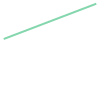

In [533]:
# Create LineString from coordinates
start, end = [(geom0.x, geom0.y), (geom1.x, geom1.y)]
line = LineString([start, end])
print(f"Geometry type: {str(type(line))}")
line

In [534]:
def make_lines(gdf, df_out, i, geometry = 'geometry'):
    geom0 = gdf.loc[i][geometry]
    geom1 = gdf.loc[i + 1][geometry]
    
    start, end = [(geom0.x, geom0.y), (geom1.x, geom1.y)]
    line = LineString([start, end])
    
    # Create a DataFrame to hold record
    data = {'id': i,
            'geometry': [line]}
    df_line = pd.DataFrame(data, columns = ['id', 'geometry'])
    
    # Add record DataFrame of compiled records
    df_out = pd.concat([df_out, df_line])
    return df_out

In [535]:
# initialize an output DataFrame
df = pd.DataFrame(columns = ['id', 'geometry'])

# Loop through each row of the input point GeoDataFrame
x = 0
while x < len(traj) - 1:
    df = make_lines(traj, df, x)
    x = x + 1
    
df.head()

,id,geometry
0,0,"LINESTRING (1.9471986 48.90440479999999, 1.941..."
0,1,"LINESTRING (1.941615 48.9022772, 1.9010209 48...."
0,2,"LINESTRING (1.9010209 48.9284162, 1.9137669 48..."
0,3,"LINESTRING (1.9137669 48.9401293, 1.907316 48...."
0,4,"LINESTRING (1.907316 48.939376, 1.9057317 48.9..."


In [536]:
crs = {'init': 'epsg:4326'}
gdf_line = gpd.GeoDataFrame(df, crs=crs)
gdf_line.head()

,id,geometry
0,0,"LINESTRING (1.9471986 48.90440479999999, 1.941..."
0,1,"LINESTRING (1.941615 48.9022772, 1.9010209 48...."
0,2,"LINESTRING (1.9010209 48.9284162, 1.9137669 48..."
0,3,"LINESTRING (1.9137669 48.9401293, 1.907316 48...."
0,4,"LINESTRING (1.907316 48.939376, 1.9057317 48.9..."


In [537]:
folium.GeoJson(gdf_line)

In [538]:
trajectories = folium.FeatureGroup("Trajectories")

# for a in prod_loc_ex.values:
#     id_producteur, nom, entreprise, ville, code_postal, adresse, latitude, longitude, type_culture = a
producteurs.add_child(folium.GeoJson(gdf_line))
    
m.add_child(trajectories)

m

In [550]:
simulation_start = datetime.datetime(2019, 4, 27, 5, 32)
simulation_time_delta = 30 #s
simulation_steps = 50

NameError: name 'datetime' is not defined

In [551]:
heat_data = [[[row['lat'],row['lon']] for row in start_loc[start_loc['time'].isin(range(i+1))].iterrows()] for i in range(0,simulation_steps)]
start_date = datetime.datetime.now()
#start_date = simulation_start
#names = [(start_date+ i*datetime.timedelta(seconds=simulation_time_delta)).strftime('%D-%H-%M-%S') for i in range(len(heat_data))]

heatmap = folium.plugins.HeatMapWithTime(heat_data, 
                                         #index=list(call_times), 
                                         radius = 2,#10,
                                         auto_play=True,
                                         index=names
                                         )

heatmap.add_to(m)
m

NameError: name 'simulation_steps' is not defined